In [1]:
from config import *
from map_wrapper import *

In [2]:
print(f"{year}-{month:02}")

2020-06


In [3]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from mpl_toolkits.basemap import Basemap

In [4]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

In [5]:
conn=db.get_conn()

In [6]:

cities = """
('北京','上海','深圳','杭州','广州','南京','苏州','成都','东莞','西安','武汉','天津','长沙',
'宁波','福州','大连','重庆','青岛','济南','合肥','长春','昆明','郑州','沈阳','哈尔滨','厦门')
"""
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000 and city in {cities}", con=conn)


In [7]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [8]:
del data['publish_date']
del data['published_on_weekend']
del data['title']
del data['job_description']
del data['job_id']

In [9]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['平均工资']=salary_mean
    sub_data['最低工资']=salary_95_min
    sub_data['中位数']=salary_median
    sub_data['最高工资']=salary_95_max
    sub_data['招聘人数']=count
    sub_data['百分比']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='平均工资', ascending=False)

    return sub_data

data_format={"百分比":"{:.2%}","平均工资":"{:.0f}","中位数":"{:.0f}","最低工资":"{:.0f}","最高工资":"{:.0f}"}

translate_dict={}


# 程序员工资

In [10]:
data_city=get_sub_stats_by_col(data,'city')
data_city['排名']=list(range(1,data_city.shape[0]+1))
data_city=data_city[['排名', 'city', '平均工资', '最低工资', '中位数', '最高工资', '招聘人数', '百分比']]
data_city.style.format(data_format)

,排名,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,1,北京,19082,7000,17500,45000,23986,8.46%
0,2,上海,17382,7000,15500,37500,50209,17.71%
2,3,深圳,16952,7000,15000,37500,43810,15.45%
7,4,杭州,16454,6701,15000,37500,16878,5.95%
3,5,广州,14233,5250,12500,30000,32044,11.30%
1,6,南京,13982,5250,12500,29166,16498,5.82%
17,7,东莞,13338,5250,12500,23550,3587,1.27%
11,8,苏州,13070,5250,12500,27500,8254,2.91%
5,9,成都,13033,5250,12000,30000,14540,5.13%
23,10,厦门,12844,3750,12500,25000,2071,0.73%


In [11]:
def describe(data_city, career):
    for index, row in data_city.iterrows():
        print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

In [12]:
career='软件工程师'
for index, row in data_city.iterrows():
    print(f"{year}年{month}月{row['city']}招收{career}{row['招聘人数']}人。2019年{month}月{row['city']}{career}平均工资{row['平均工资']:.0f}元，工资中位数{row['中位数']:.0f}元，其中95%的人的工资介于{row['最低工资']:.0f}元到{row['最高工资']:.0f}元。\r\n")

2020年6月北京招收软件工程师23986人。2019年6月北京软件工程师平均工资19082元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年6月上海招收软件工程师50209人。2019年6月上海软件工程师平均工资17382元，工资中位数15500元，其中95%的人的工资介于7000元到37500元。

2020年6月深圳招收软件工程师43810人。2019年6月深圳软件工程师平均工资16952元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年6月杭州招收软件工程师16878人。2019年6月杭州软件工程师平均工资16454元，工资中位数15000元，其中95%的人的工资介于6701元到37500元。

2020年6月广州招收软件工程师32044人。2019年6月广州软件工程师平均工资14233元，工资中位数12500元，其中95%的人的工资介于5250元到30000元。

2020年6月南京招收软件工程师16498人。2019年6月南京软件工程师平均工资13982元，工资中位数12500元，其中95%的人的工资介于5250元到29166元。

2020年6月东莞招收软件工程师3587人。2019年6月东莞软件工程师平均工资13338元，工资中位数12500元，其中95%的人的工资介于5250元到23550元。

2020年6月苏州招收软件工程师8254人。2019年6月苏州软件工程师平均工资13070元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年6月成都招收软件工程师14540人。2019年6月成都软件工程师平均工资13033元，工资中位数12000元，其中95%的人的工资介于5250元到30000元。

2020年6月厦门招收软件工程师2071人。2019年6月厦门软件工程师平均工资12844元，工资中位数12500元，其中95%的人的工资介于3750元到25000元。

2020年6月西安招收软件工程师9232人。2019年6月西安软件工程师平均工资12461元，工资中位数11500元，其中95%的人的工资介于5250元到27500元。

2020年6月武汉招收软件工程师14859人。2019年6月武汉软件工程师平均工资12325元

In [66]:
describe(data_city,'软件工程师')

2020年5月北京招收软件工程师24478人。2019年5月北京软件工程师平均工资19273元，工资中位数17500元，其中95%的人的工资介于7000元到45000元。

2020年5月上海招收软件工程师51403人。2019年5月上海软件工程师平均工资17477元，工资中位数15500元，其中95%的人的工资介于7000元到40000元。

2020年5月深圳招收软件工程师44509人。2019年5月深圳软件工程师平均工资17052元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年5月杭州招收软件工程师20042人。2019年5月杭州软件工程师平均工资15089元，工资中位数12500元，其中95%的人的工资介于3750元到37500元。

2020年5月广州招收软件工程师32997人。2019年5月广州软件工程师平均工资14238元，工资中位数12500元，其中95%的人的工资介于5500元到30000元。

2020年5月南京招收软件工程师16337人。2019年5月南京软件工程师平均工资13933元，工资中位数12500元，其中95%的人的工资介于5500元到27500元。

2020年5月东莞招收软件工程师3464人。2019年5月东莞软件工程师平均工资13284元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年5月苏州招收软件工程师8347人。2019年5月苏州软件工程师平均工资13119元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年5月成都招收软件工程师14790人。2019年5月成都软件工程师平均工资13117元，工资中位数12500元，其中95%的人的工资介于5250元到30000元。

2020年5月西安招收软件工程师9634人。2019年5月西安软件工程师平均工资12642元，工资中位数12000元，其中95%的人的工资介于5250元到27500元。

2020年5月大连招收软件工程师7142人。2019年5月大连软件工程师平均工资12590元，工资中位数10000元，其中95%的人的工资介于5000元到35000元。

2020年5月厦门招收软件工程师1897人。2019年5月厦门软件工程师平均工资12426元，

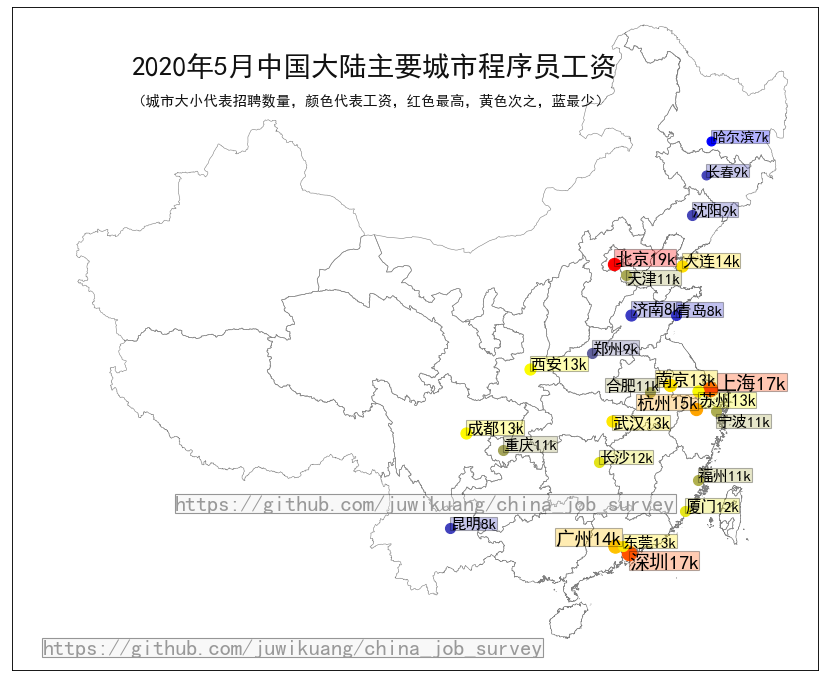

In [13]:
draw_city_map(data_city,2000,f'{year}年{month}月中国大陆主要城市程序员工资')

# 区块链工程师

In [16]:
data_blockchain=get_sub_stats_by_col(data[(data['career']=='区块链开发')],'city')

data_blockchain.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
10,大连,30000,30000,30000,30000,1,0.12%
0,上海,27474,9000,28000,62500,134,16.01%
7,郑州,22500,22500,22500,22500,5,0.60%
3,北京,20169,9000,19484,40000,72,8.60%
11,宁波,18910,12500,20833,20833,13,1.55%
9,长沙,18818,7000,18818,20000,33,3.94%
5,深圳,18112,7000,17875,29219,85,10.16%
2,杭州,17970,5250,20000,38350,122,14.58%
1,广州,16720,6000,15000,30000,231,27.60%
12,东莞,15938,12500,15938,18000,8,0.96%


In [17]:
describe(data_blockchain,'区块链工程师')

2020年5月大连招收区块链工程师1人。2019年5月大连区块链工程师平均工资30000元，工资中位数30000元，其中95%的人的工资介于30000元到30000元。

2020年5月上海招收区块链工程师134人。2019年5月上海区块链工程师平均工资27474元，工资中位数28000元，其中95%的人的工资介于9000元到62500元。

2020年5月郑州招收区块链工程师5人。2019年5月郑州区块链工程师平均工资22500元，工资中位数22500元，其中95%的人的工资介于22500元到22500元。

2020年5月北京招收区块链工程师72人。2019年5月北京区块链工程师平均工资20169元，工资中位数19484元，其中95%的人的工资介于9000元到40000元。

2020年5月宁波招收区块链工程师13人。2019年5月宁波区块链工程师平均工资18910元，工资中位数20833元，其中95%的人的工资介于12500元到20833元。

2020年5月长沙招收区块链工程师33人。2019年5月长沙区块链工程师平均工资18818元，工资中位数18818元，其中95%的人的工资介于7000元到20000元。

2020年5月深圳招收区块链工程师85人。2019年5月深圳区块链工程师平均工资18112元，工资中位数17875元，其中95%的人的工资介于7000元到29219元。

2020年5月杭州招收区块链工程师122人。2019年5月杭州区块链工程师平均工资17970元，工资中位数20000元，其中95%的人的工资介于5250元到38350元。

2020年5月广州招收区块链工程师231人。2019年5月广州区块链工程师平均工资16720元，工资中位数15000元，其中95%的人的工资介于6000元到30000元。

2020年5月东莞招收区块链工程师8人。2019年5月东莞区块链工程师平均工资15938元，工资中位数15938元，其中95%的人的工资介于12500元到18000元。

2020年5月成都招收区块链工程师42人。2019年5月成都区块链工程师平均工资15171元，工资中位数12917元，其中95%的人的工资介于7000元到25000元。

2020年5月南京招收区块链工程师10人。2019年5月南京区块链工程师平均工资14600元，工资中

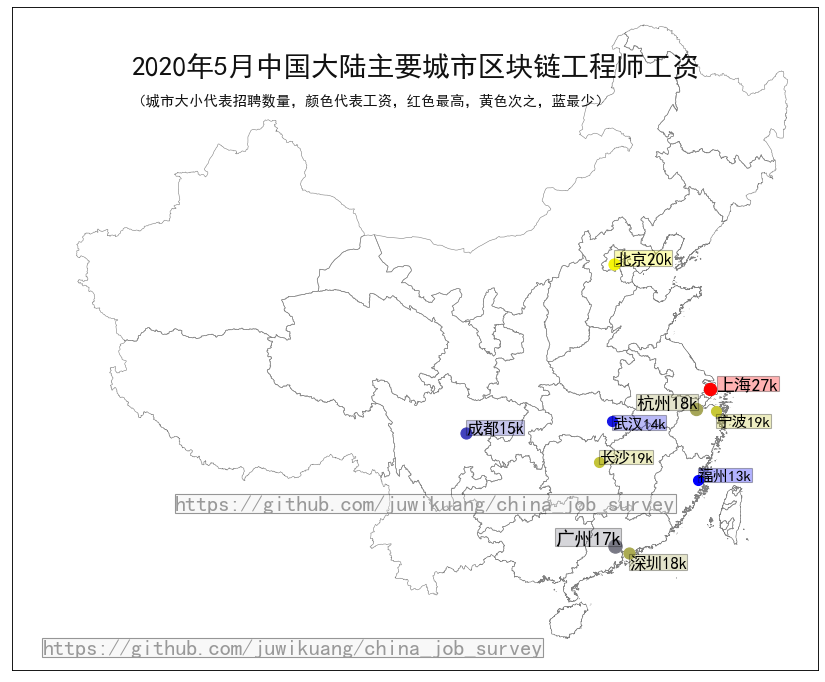

In [18]:
draw_city_map(data_blockchain[data_blockchain['招聘人数']>10],10,f'{year}年{month}月中国大陆主要城市区块链工程师工资')

# 机器学习工程师

In [19]:
data_city_algorithm=get_sub_stats_by_col(data[data.career=='机器学习'],'city')
data_city_algorithm.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
0,北京,26960,5700,22500,57266,196,17.80%
7,深圳,26772,6738,22500,58333,185,16.80%
3,上海,23993,7000,22500,51562,225,20.44%
8,合肥,18500,15000,17500,22500,5,0.45%
14,天津,17500,17500,17500,17500,5,0.45%
4,杭州,16542,4500,17500,30000,96,8.72%
13,宁波,15806,7250,15000,22500,9,0.82%
2,广州,15521,5146,14300,35000,122,11.08%
5,南京,15035,7125,13500,33625,85,7.72%
9,苏州,14845,8500,12722,26938,29,2.63%


In [20]:
describe(data_city_algorithm,'机器学习')

2020年5月北京招收机器学习196人。2019年5月北京机器学习平均工资26960元，工资中位数22500元，其中95%的人的工资介于5700元到57266元。

2020年5月深圳招收机器学习185人。2019年5月深圳机器学习平均工资26772元，工资中位数22500元，其中95%的人的工资介于6738元到58333元。

2020年5月上海招收机器学习225人。2019年5月上海机器学习平均工资23993元，工资中位数22500元，其中95%的人的工资介于7000元到51562元。

2020年5月合肥招收机器学习5人。2019年5月合肥机器学习平均工资18500元，工资中位数17500元，其中95%的人的工资介于15000元到22500元。

2020年5月天津招收机器学习5人。2019年5月天津机器学习平均工资17500元，工资中位数17500元，其中95%的人的工资介于17500元到17500元。

2020年5月杭州招收机器学习96人。2019年5月杭州机器学习平均工资16542元，工资中位数17500元，其中95%的人的工资介于4500元到30000元。

2020年5月宁波招收机器学习9人。2019年5月宁波机器学习平均工资15806元，工资中位数15000元，其中95%的人的工资介于7250元到22500元。

2020年5月广州招收机器学习122人。2019年5月广州机器学习平均工资15521元，工资中位数14300元，其中95%的人的工资介于5146元到35000元。

2020年5月南京招收机器学习85人。2019年5月南京机器学习平均工资15035元，工资中位数13500元，其中95%的人的工资介于7125元到33625元。

2020年5月苏州招收机器学习29人。2019年5月苏州机器学习平均工资14845元，工资中位数12722元，其中95%的人的工资介于8500元到26938元。

2020年5月大连招收机器学习8人。2019年5月大连机器学习平均工资14688元，工资中位数15286元，其中95%的人的工资介于8500元到17000元。

2020年5月成都招收机器学习35人。2019年5月成都机器学习平均工资13543元，工资中位数13125元，其中95%的人的工资介于9082元到27500元。

2020年5月西安招收机器学

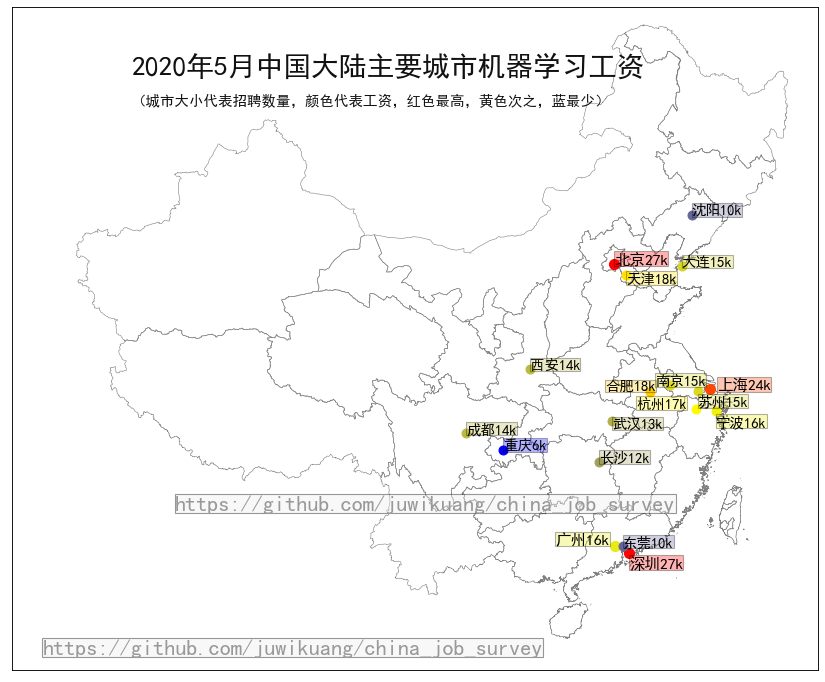

In [21]:
draw_city_map(data_city_algorithm,100,f'{year}年{month}月中国大陆主要城市机器学习工资')

# 系统架构师

In [23]:
data_city_architect=get_sub_stats_by_col(data[data.career=='架构师'],'city')
data_city_architect.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
1,北京,31334,13000,30000,55000,944,14.14%
3,上海,30306,7733,30000,60000,1384,20.72%
6,深圳,29815,13875,30000,52500,1125,16.85%
4,杭州,28581,14583,27500,52673,503,7.53%
2,广州,25335,10741,25000,45000,878,13.15%
5,成都,23719,7900,22500,45750,208,3.11%
11,南京,23040,12000,22667,35146,338,5.06%
14,苏州,22678,4029,20083,75000,124,1.86%
19,厦门,22296,10000,22500,33687,27,0.40%
13,西安,20376,8200,20000,34861,170,2.55%


In [24]:
describe(data_city_architect,'架构师')

2020年5月北京招收架构师944人。2019年5月北京架构师平均工资31334元，工资中位数30000元，其中95%的人的工资介于13000元到55000元。

2020年5月上海招收架构师1384人。2019年5月上海架构师平均工资30306元，工资中位数30000元，其中95%的人的工资介于7733元到60000元。

2020年5月深圳招收架构师1125人。2019年5月深圳架构师平均工资29815元，工资中位数30000元，其中95%的人的工资介于13875元到52500元。

2020年5月杭州招收架构师503人。2019年5月杭州架构师平均工资28581元，工资中位数27500元，其中95%的人的工资介于14583元到52673元。

2020年5月广州招收架构师878人。2019年5月广州架构师平均工资25335元，工资中位数25000元，其中95%的人的工资介于10741元到45000元。

2020年5月成都招收架构师208人。2019年5月成都架构师平均工资23719元，工资中位数22500元，其中95%的人的工资介于7900元到45750元。

2020年5月南京招收架构师338人。2019年5月南京架构师平均工资23040元，工资中位数22667元，其中95%的人的工资介于12000元到35146元。

2020年5月苏州招收架构师124人。2019年5月苏州架构师平均工资22678元，工资中位数20083元，其中95%的人的工资介于4029元到75000元。

2020年5月厦门招收架构师27人。2019年5月厦门架构师平均工资22296元，工资中位数22500元，其中95%的人的工资介于10000元到33687元。

2020年5月西安招收架构师170人。2019年5月西安架构师平均工资20376元，工资中位数20000元，其中95%的人的工资介于8200元到34861元。

2020年5月东莞招收架构师30人。2019年5月东莞架构师平均工资20264元，工资中位数15000元，其中95%的人的工资介于11583元到45000元。

2020年5月合肥招收架构师25人。2019年5月合肥架构师平均工资19623元，工资中位数18875元，其中95%的人的工资介于7500元到29166元。

2020年5月武汉招收架构师311人。201

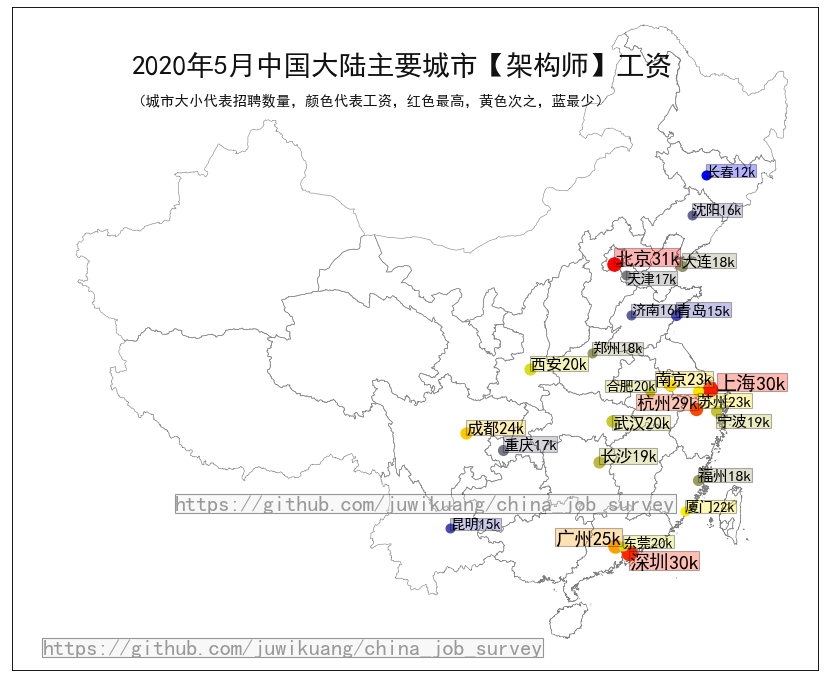

In [25]:
draw_city_map(data_city_architect,40,f'{year}年{month}月中国大陆主要城市【架构师】工资')

# 生物信息工程师

In [28]:
data_bio=get_sub_stats_by_col(data[data.career=='生物信息'],'city')
data_bio.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
4,宁波,16000,16000,16000,16000,1,3.23%
3,北京,15000,15000,15000,15000,5,16.13%
6,长沙,12500,12500,12500,12500,1,3.23%
5,上海,11786,8000,11600,17500,7,22.58%
2,杭州,11500,11500,11500,11500,1,3.23%
0,广州,11389,7000,12333,14000,9,29.03%
1,苏州,10750,5500,12500,12500,4,12.90%
7,南京,9000,9000,9000,9000,3,9.68%


In [29]:
describe(data_bio,'生物信息工程师')

2020年5月宁波招收生物信息工程师1人。2019年5月宁波生物信息工程师平均工资16000元，工资中位数16000元，其中95%的人的工资介于16000元到16000元。

2020年5月北京招收生物信息工程师5人。2019年5月北京生物信息工程师平均工资15000元，工资中位数15000元，其中95%的人的工资介于15000元到15000元。

2020年5月长沙招收生物信息工程师1人。2019年5月长沙生物信息工程师平均工资12500元，工资中位数12500元，其中95%的人的工资介于12500元到12500元。

2020年5月上海招收生物信息工程师7人。2019年5月上海生物信息工程师平均工资11786元，工资中位数11600元，其中95%的人的工资介于8000元到17500元。

2020年5月杭州招收生物信息工程师1人。2019年5月杭州生物信息工程师平均工资11500元，工资中位数11500元，其中95%的人的工资介于11500元到11500元。

2020年5月广州招收生物信息工程师9人。2019年5月广州生物信息工程师平均工资11389元，工资中位数12333元，其中95%的人的工资介于7000元到14000元。

2020年5月苏州招收生物信息工程师4人。2019年5月苏州生物信息工程师平均工资10750元，工资中位数12500元，其中95%的人的工资介于5500元到12500元。

2020年5月南京招收生物信息工程师3人。2019年5月南京生物信息工程师平均工资9000元，工资中位数9000元，其中95%的人的工资介于9000元到9000元。



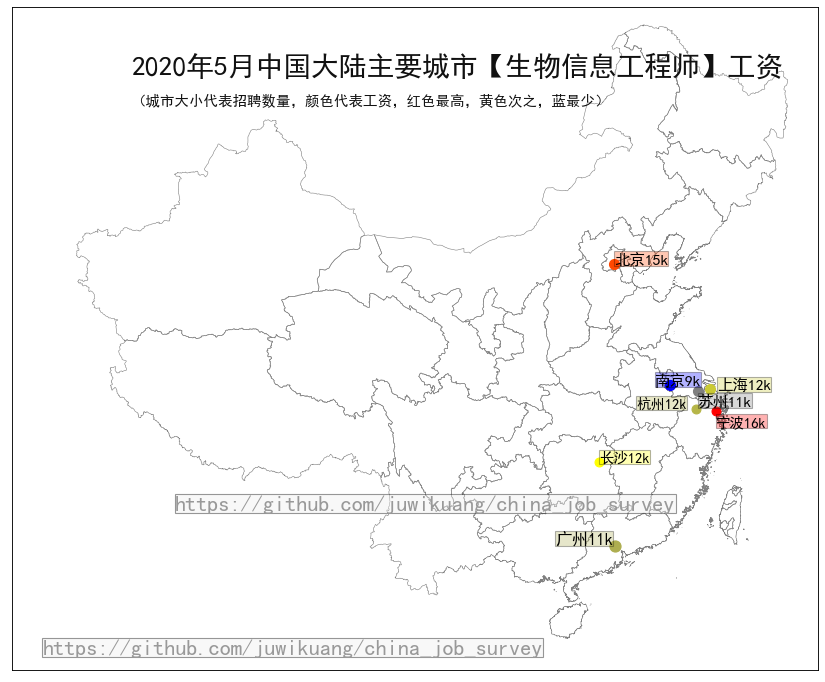

In [30]:
draw_city_map(data_bio,2,f'{year}年{month}月中国大陆主要城市【生物信息工程师】工资')

# 爬虫工程师

In [33]:
data_spider=get_sub_stats_by_col(data[data.career=='爬虫开发工程师'],'city')
data_spider=data_spider[data_spider['招聘人数']>10]
data_spider.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
9,北京,17512,7500,16786,33750,80,12.86%
10,杭州,15654,7000,16000,27500,13,2.09%
0,上海,14593,4875,14000,32083,110,17.68%
2,深圳,14293,8558,12500,25000,147,23.63%
4,南京,13118,8000,12500,20000,34,5.47%
3,广州,13040,6369,12500,21867,79,12.70%
15,苏州,12094,7000,11000,22500,16,2.57%
8,成都,10139,1750,10000,18000,54,8.68%
1,武汉,9893,3750,8929,20312,35,5.63%
5,长沙,9000,7000,7800,12500,14,2.25%


In [34]:
describe(data_spider, '爬虫开发工程师')

2020年5月北京招收爬虫开发工程师80人。2019年5月北京爬虫开发工程师平均工资17512元，工资中位数16786元，其中95%的人的工资介于7500元到33750元。

2020年5月杭州招收爬虫开发工程师13人。2019年5月杭州爬虫开发工程师平均工资15654元，工资中位数16000元，其中95%的人的工资介于7000元到27500元。

2020年5月上海招收爬虫开发工程师110人。2019年5月上海爬虫开发工程师平均工资14593元，工资中位数14000元，其中95%的人的工资介于4875元到32083元。

2020年5月深圳招收爬虫开发工程师147人。2019年5月深圳爬虫开发工程师平均工资14293元，工资中位数12500元，其中95%的人的工资介于8558元到25000元。

2020年5月南京招收爬虫开发工程师34人。2019年5月南京爬虫开发工程师平均工资13118元，工资中位数12500元，其中95%的人的工资介于8000元到20000元。

2020年5月广州招收爬虫开发工程师79人。2019年5月广州爬虫开发工程师平均工资13040元，工资中位数12500元，其中95%的人的工资介于6369元到21867元。

2020年5月苏州招收爬虫开发工程师16人。2019年5月苏州爬虫开发工程师平均工资12094元，工资中位数11000元，其中95%的人的工资介于7000元到22500元。

2020年5月成都招收爬虫开发工程师54人。2019年5月成都爬虫开发工程师平均工资10139元，工资中位数10000元，其中95%的人的工资介于1750元到18000元。

2020年5月武汉招收爬虫开发工程师35人。2019年5月武汉爬虫开发工程师平均工资9893元，工资中位数8929元，其中95%的人的工资介于3750元到20312元。

2020年5月长沙招收爬虫开发工程师14人。2019年5月长沙爬虫开发工程师平均工资9000元，工资中位数7800元，其中95%的人的工资介于7000元到12500元。



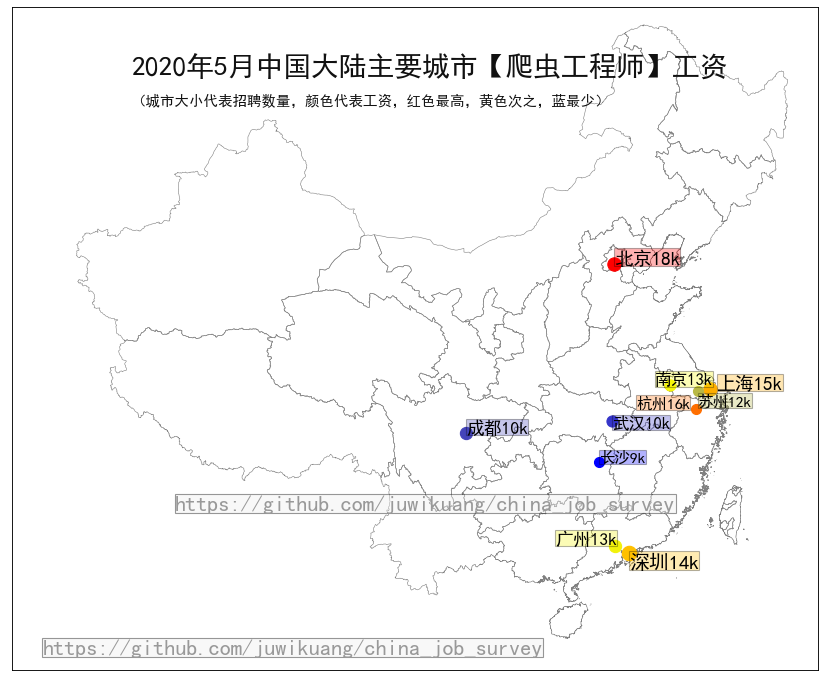

In [35]:
draw_city_map(data_spider,5,f'{year}年{month}月中国大陆主要城市【爬虫工程师】工资')

# Java程序员

In [36]:
data_java=get_sub_stats_by_col(data[(data.pl_java==1)],'city')
data_java.style.format(data_format)

,city,平均工资,最低工资,中位数,最高工资,招聘人数,百分比
2,北京,18042,6500,15000,42500,13238,9.28%
5,上海,17199,7000,15000,40000,22763,15.96%
1,深圳,17175,7000,15000,37500,17542,12.30%
6,杭州,16024,5779,14000,40000,8490,5.95%
7,武汉,14924,5250,12500,26000,7308,5.12%
10,大连,14732,5000,12500,32500,6202,4.35%
8,广州,14639,6000,12500,30000,16817,11.79%
20,东莞,13659,5250,12500,22500,1285,0.90%
0,南京,13592,5250,12500,27500,9384,6.58%
16,西安,13531,5250,12500,30000,5158,3.62%


In [37]:
describe(data_java, 'Java程序员')

2020年5月北京招收Java程序员13238人。2019年5月北京Java程序员平均工资18042元，工资中位数15000元，其中95%的人的工资介于6500元到42500元。

2020年5月上海招收Java程序员22763人。2019年5月上海Java程序员平均工资17199元，工资中位数15000元，其中95%的人的工资介于7000元到40000元。

2020年5月深圳招收Java程序员17542人。2019年5月深圳Java程序员平均工资17175元，工资中位数15000元，其中95%的人的工资介于7000元到37500元。

2020年5月杭州招收Java程序员8490人。2019年5月杭州Java程序员平均工资16024元，工资中位数14000元，其中95%的人的工资介于5779元到40000元。

2020年5月武汉招收Java程序员7308人。2019年5月武汉Java程序员平均工资14924元，工资中位数12500元，其中95%的人的工资介于5250元到26000元。

2020年5月大连招收Java程序员6202人。2019年5月大连Java程序员平均工资14732元，工资中位数12500元，其中95%的人的工资介于5000元到32500元。

2020年5月广州招收Java程序员16817人。2019年5月广州Java程序员平均工资14639元，工资中位数12500元，其中95%的人的工资介于6000元到30000元。

2020年5月东莞招收Java程序员1285人。2019年5月东莞Java程序员平均工资13659元，工资中位数12500元，其中95%的人的工资介于5250元到22500元。

2020年5月南京招收Java程序员9384人。2019年5月南京Java程序员平均工资13592元，工资中位数12500元，其中95%的人的工资介于5250元到27500元。

2020年5月西安招收Java程序员5158人。2019年5月西安Java程序员平均工资13531元，工资中位数12500元，其中95%的人的工资介于5250元到30000元。

2020年5月成都招收Java程序员6339人。2019年5月成都Java程序员平均工资13078元，工资中位数12500元，其中95%的人的工资介于5250元到25000元。

2020年5

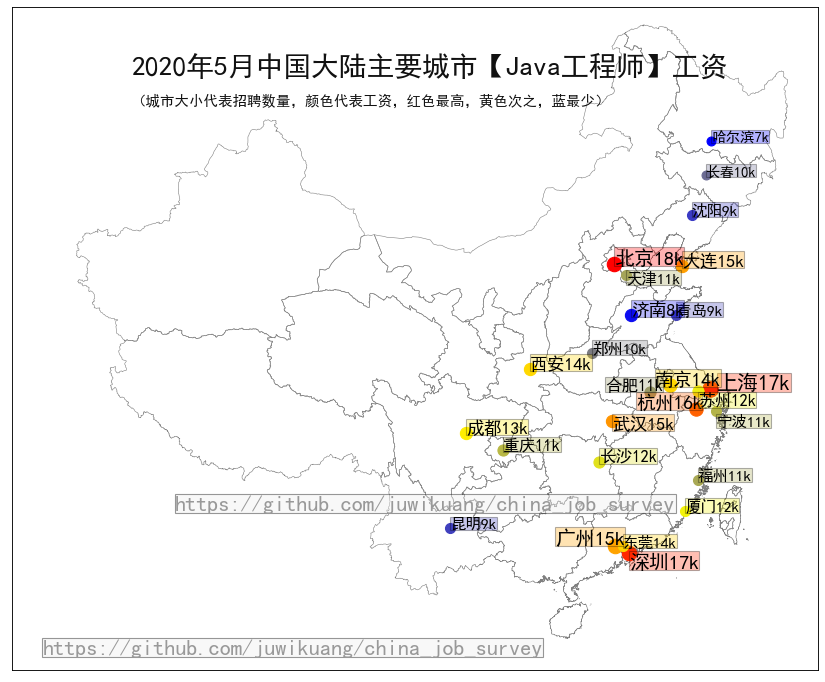

In [44]:
draw_city_map(data_java, 500, f'{year}年{month}月中国大陆主要城市【Java工程师】工资')

In [13]:
history_data = pd.read_sql(sql='select * from CityStats', con=conn)

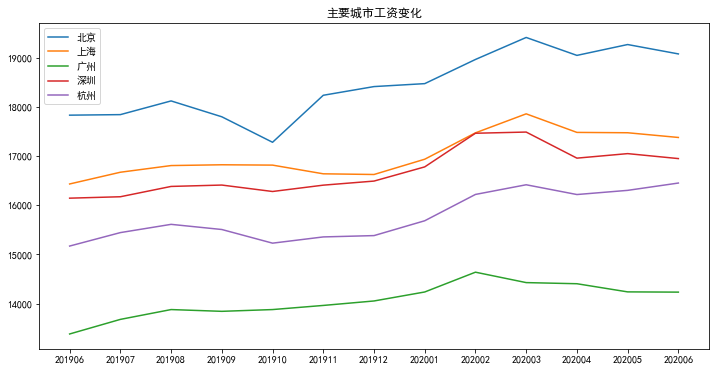

In [14]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(12,6))
cities = set(history_data.City)
cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend()
plt.show()

No handles with labels found to put in legend.


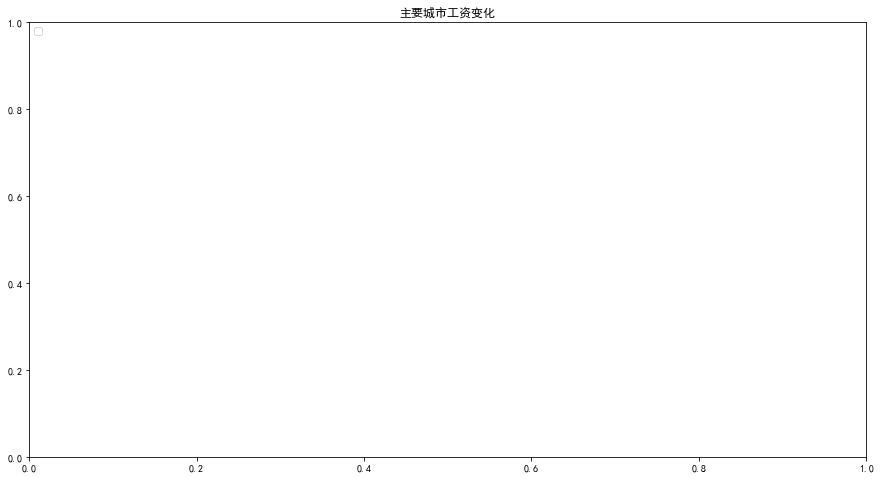

In [15]:
#plt.plot("Month","Salary",data=data_hangzhou, label='杭州')
#plt.plot("Month","Salary",data=history_data[history_data.City=='南京'], label='南京')
plt.figure(figsize=(15,8))
cities = set(history_data.City)
#cities = ['北京','上海','广州','深圳','杭州']
for city in cities:
    values=history_data[history_data.City==city]['Salary'].values
    if abs(values[-1]-values[-2])>1000:
        plt.plot("Month","Salary",data=history_data[history_data.City==city], label=city)
    
    #plt.show()
plt.title('主要城市工资变化')
plt.legend( loc='upper left')
plt.show()

In [16]:
values=history_data[history_data.City==city]['Salary'].values